### Flight Price Prediction

<img src="https://www.gannett-cdn.com/presto/2019/06/23/USAT/c3a9f051-bd6c-4b39-b5b9-38244deec783-GettyImages-932651818.jpg?auto=webp&crop=667,375,x0,y80&format=pjpg&width=1200" style="height:600px">

### Importing Necessary Librarires

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio.plotly import iplot,plot
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Automated EDA

In [4]:
import pandas_profiling as pf

In [5]:
pf.ProfileReport(df)

### Manuel EDA

In [6]:
df.shape

(10683, 11)

In [7]:
df.dtypes # checking datatypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

- Datatypes seem to be normal.
- We may need to format datetime columns as datetime

#### Checking missing values

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Visualization 

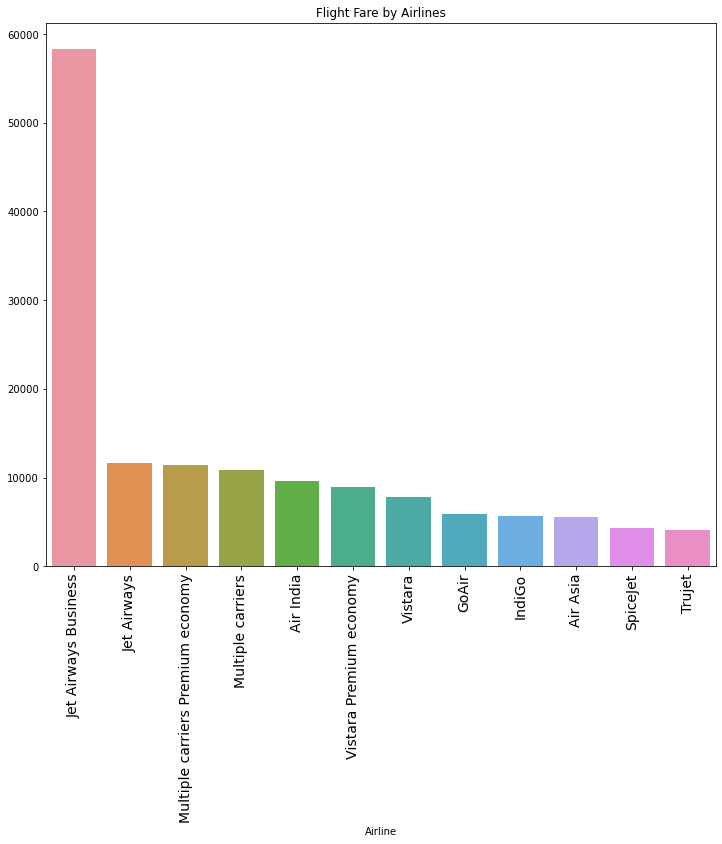

In [10]:
Prices =  df.groupby('Airline')['Price'].mean().sort_values(ascending = False)
plt.figure(figsize=(12,10))
sns.barplot(Prices.index,Prices.values)
plt.xticks(rotation=90,fontsize=14)
plt.title('Flight Fare by Airlines')
plt.show()

- Insight 

#### Jet Airways Business has the highest flight price whereas Trujet has lowest price

### Price based on number of stops

In [11]:
df.groupby(['Airline','Total_Stops'])['Price'].mean().to_frame()

Price
Airline                           Total_Stops              
Air Asia                          1 stop        7078.325581
                                  2 stops       6341.888889
                                  non-stop      4492.331492
Air India                         1 stop        9041.509259
                                  2 stops      12092.779101
                                  3 stops      12208.054054
                                  4 stops      17686.000000
                                  non-stop      5605.326139
GoAir                             1 stop        6884.676471
                                  non-stop      4726.173913
IndiGo                            1 stop        7104.717528
                                  2 stops       7507.526316
                                  non-stop      4731.174053
Jet Airways                       1 stop       12512.741223
                                  2 stops      13387.247467
                                  non-stop      6175.078652
Jet Airways Business              1 stop       62844.250000
                                  2 stops      49387.500000
Multiple carriers                 1 stop       10711.316157
                                  2 stops      14809.395349
                                  3 stops      17292.750000
Multiple carriers Premium economy 1 stop       11418.846154
SpiceJet                          1 stop        6750.560811
                                  non-stop      3805.423881
Trujet                            1 stop        4140.000000
Vistara                           1 stop        9641.148837
                                  non-stop      6293.954545
Vistara Premium economy           non-stop      8962.333333

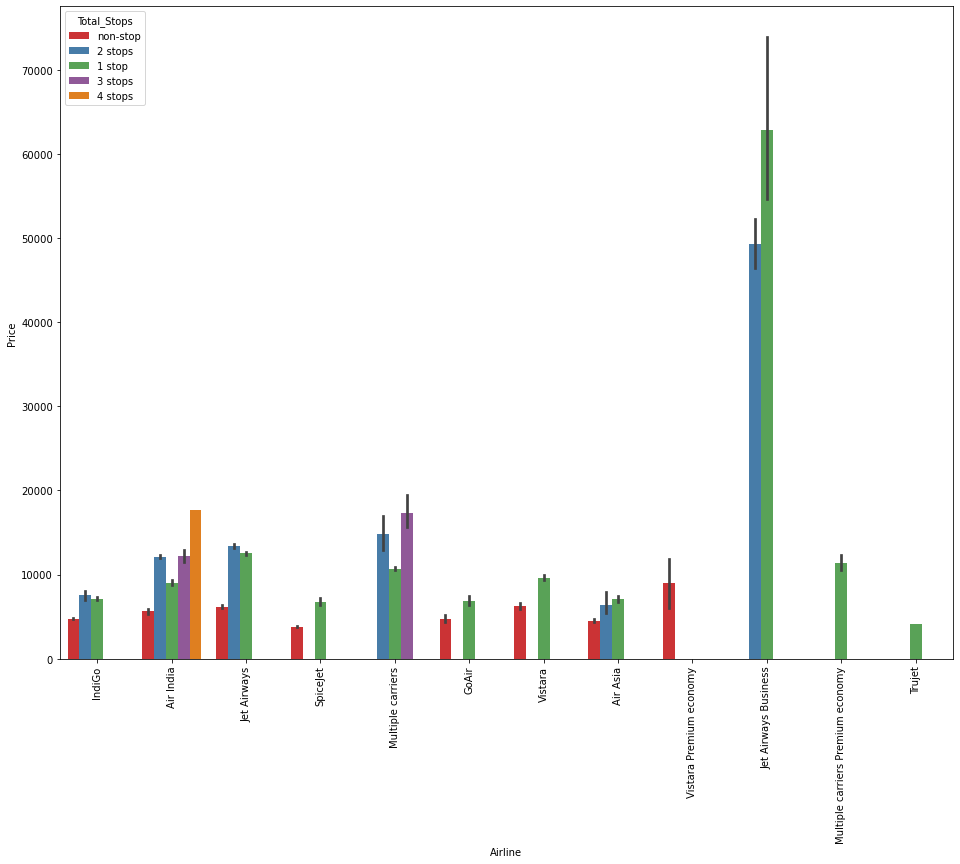

In [12]:
plt.figure(figsize=(16,12))
ax = sns.barplot(x=df['Airline'],y=df['Price'],hue = df['Total_Stops'],palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**One stop and two stops Jet Airway Business is having the higher price**

In [13]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Source vs Price

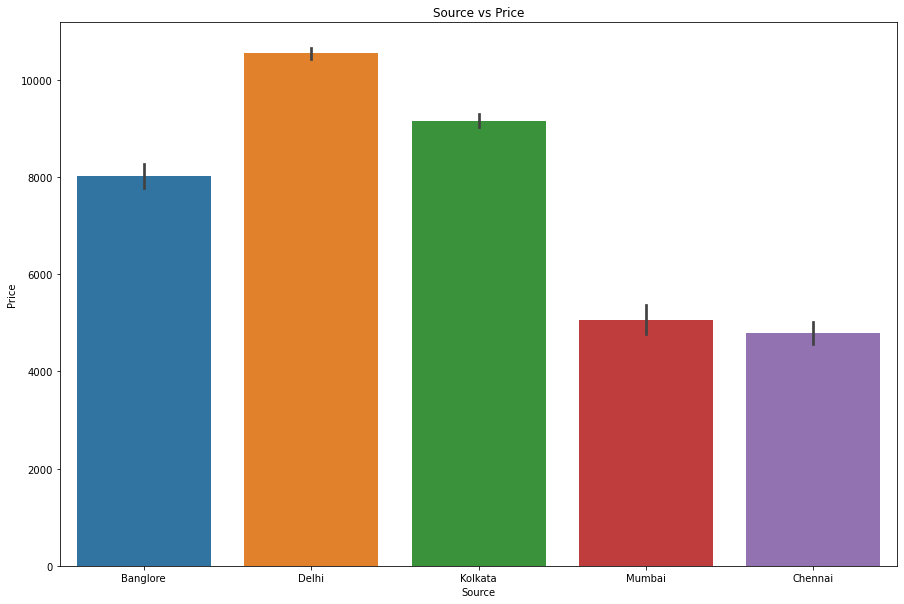

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.title('Source vs Price')
plt.show()

- Delhi is the highest price

### Destination vs Price

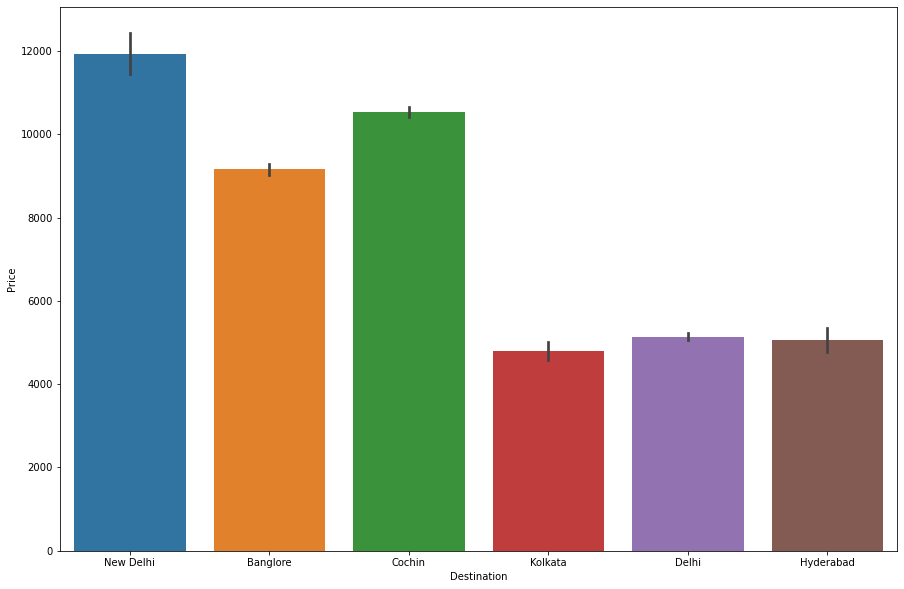

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Destination'],y=df['Price'],data=df.sort_values('Price',ascending=False))
plt.show()

- New Delhi is the highest price 

In [16]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

- We need to replace New Delhi with Delhi

In [17]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [18]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

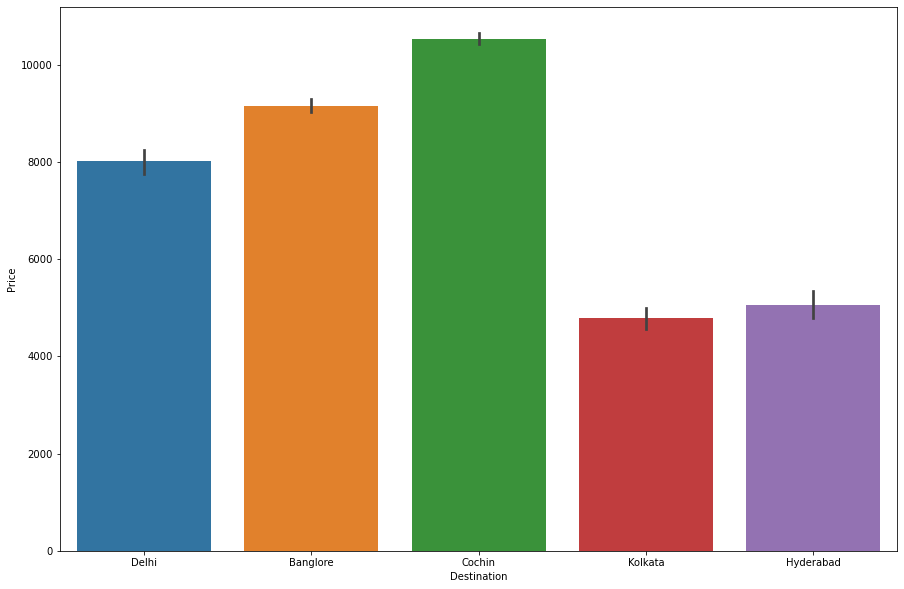

In [19]:
plt.figure(figsize=(15,10))  ## We plot again our destination
sns.barplot(x=df['Destination'],y=df['Price'],data=df.sort_values('Price',ascending=False))
plt.show()

#### After We replaced New Delhi with Delhi, destination with the highest price has changed. Now Cochin is the highest price followed by Banglore and Delhi

### Feature Engineering

##### Let's convert Date_of_Journey to its approproate format as **datetime** with regard to day and month

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [21]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [22]:
df.info() ## checking datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.3+ MB


### 'Date of Journey'

In [23]:
df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day # creating new column as day
df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month # creating new column as month

In [24]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


### 'Dep_Time'

In [25]:
# convert to datetime
df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [26]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25


- We can now drop the ' Dep_Time'

In [27]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


### 'Arrival Time'

In [29]:
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [30]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25


- We can now drop the ' Arrival_Time'

In [31]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

### ' Duration_Time'

In [32]:
duration = df['Duration'].str.split(' ',expand=True)

In [33]:
duration[1].fillna('00m',inplace=True)

In [34]:
df['duration_hr'] = duration[0].apply(lambda x : x.replace('h','').replace('m',''))

In [35]:
df['duration_min'] = duration[1].apply(lambda x : x.replace('m',''))

In [36]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


- Dropping duration columns

In [37]:
df.drop('Duration',axis=1,inplace=True)

In [38]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


## Count of Airline

In [39]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Apply Onehot Encoding

In [40]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


### Total Stops

In [41]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

### Airline

In [43]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [44]:
airline_dummy = pd.get_dummies(df['Airline'],drop_first=True)

### Source & Destination

In [45]:
source_destination_dummy = pd.get_dummies(df[['Source','Destination']],drop_first=True)

##### Now We converted our categorical feautres into dummy variables. Next step is to concatenate our dummies created by pd.get_dummies function with our original df 

#### Concat  Dummies with Dataset

In [46]:
df = pd.concat([df,airline_dummy,source_destination_dummy],axis=1)

In [47]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,...,0,0,0,0,0,0,0,1,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,3,1,...,0,0,0,0,0,0,0,1,0,0


#### Dropping Old Categorical Values

In [48]:
df.drop(['Source','Destination','Airline'],axis=1,inplace=True)

In [49]:
df.head()

,Date_of_Journey,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,...,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2019-03-24,BLR → DEL,0,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,1,0,0
1,2019-01-05,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,...,0,0,0,0,1,0,0,0,0,0
2,2019-09-06,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,...,0,0,0,1,0,0,1,0,0,0
3,2019-12-05,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,...,0,0,0,0,1,0,0,0,0,0
4,2019-01-03,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,1,0,0


### Dropping Unnecessary Columns

In [50]:
pd.options.display.max_columns = None

In [51]:
df.head(2)

,Date_of_Journey,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2019-03-24,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019-01-05,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)


In [53]:
df.head()

,Date_of_Journey,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2019-03-24,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019-01-05,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2019-09-06,2,13882,6,9,9,25,4,25,19,00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,2019-12-05,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2019-01-03,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Test Data

In [54]:
df_test=pd.read_excel("Test_set.xlsx")

In [55]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [56]:
df_test['Destination'] = df_test['Destination'].apply(lambda x: x.replace('New Delhi','Delhi'))
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month
#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute
#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute
#Splitting duration  time
a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)

df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non­stop':0, '2 stops':2, '1 stop':1, '3 stops':3,
'4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)


df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


In [57]:
df_test.drop(['Airline','Source','Destination','Route','Additional_Info'],inplace=True,axis=1)

In [58]:
df_test.shape

(2671, 27)

In [59]:
df.shape

(10682, 30)

### Model Building and Hyperparameter Tuning

### ExtraTreeRegressor

#### Train_Test_Split

In [60]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [61]:
x= df.drop('Price',axis=1)
y = df.Price

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

#### Importing Our Model

### ExtraTree Regressor

In [64]:
from sklearn.ensemble import ExtraTreesRegressor

In [65]:
ET_Model = ExtraTreesRegressor(n_estimators=120)

In [66]:
ET_Model.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [67]:
y_predict = ET_Model.predict(x_test)

In [68]:
from sklearn.metrics import r2_score,mean_absolute_error

In [69]:
print(r2_score(y_test,y_predict))

0.7660197636215484


### Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
RF_Model = RandomForestRegressor()
RF_Model.fit(x_train,y_train)
y_predict = RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.7961168478062486

### Tuning Hyperparameter for RandomForest

In [76]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

params= {'n_estimators':n_estimators,
         'max_features':max_features,
         'max_depth':max_depth,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf}

rCV = RandomizedSearchCV(estimator=RF_Model,param_distributions=params,scoring='neg_mean_squared_error',cv=3,n_iter=10,random_state=42)





In [77]:
rCV.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [78]:
rf_pred = rCV.predict(x_test)

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [81]:
print(mean_absolute_error(y_test,rf_pred))

1157.6381034204787


In [82]:
print(mean_squared_error(y_test,rf_pred))

3968828.3005535756


In [87]:
print('R2 Score is :',round(r2_score(y_test,rf_pred),2))

R2 Score is : 0.81


### Catboost

In [120]:
from catboost import CatBoostRegressor

In [121]:
Cat_Model = CatBoostRegressor()

In [122]:
Cat_Model.fit(x_train,y_train)

Learning rate set to 0.05718
0:	learn: 4470.6177180	total: 2.78ms	remaining: 2.77s
1:	learn: 4327.6402953	total: 5.56ms	remaining: 2.77s
2:	learn: 4179.0823580	total: 7.97ms	remaining: 2.65s
3:	learn: 4039.8150071	total: 10.5ms	remaining: 2.61s
4:	learn: 3919.3698820	total: 12.8ms	remaining: 2.54s
5:	learn: 3798.0934835	total: 15.1ms	remaining: 2.51s
6:	learn: 3691.5504496	total: 17.6ms	remaining: 2.49s
7:	learn: 3591.0863832	total: 19.9ms	remaining: 2.47s
8:	learn: 3499.4378458	total: 22.3ms	remaining: 2.46s
9:	learn: 3413.2956255	total: 24.7ms	remaining: 2.44s
10:	learn: 3337.2052351	total: 27.1ms	remaining: 2.43s
11:	learn: 3265.7875217	total: 29.5ms	remaining: 2.42s
12:	learn: 3194.0628260	total: 31.8ms	remaining: 2.42s
13:	learn: 3131.6833103	total: 34.1ms	remaining: 2.4s
14:	learn: 3075.2195486	total: 36.4ms	remaining: 2.39s
15:	learn: 3018.0874944	total: 38.9ms	remaining: 2.39s
16:	learn: 2969.4473589	total: 41.5ms	remaining: 2.4s
17:	learn: 2925.9674852	total: 44ms	remaining: 2

In [123]:
cat_pred = Cat_Model.predict(x_test)

In [124]:
print('R2 Score is :',round(r2_score(y_test,cat_pred),2))

R2 Score is : 0.83


### LightGBM

In [99]:
from lightgbm import LGBMRegressor

In [103]:
lgb_model = LGBMRegressor()

In [107]:
x_train[['duration_hr','duration_min']] = df[['duration_hr','duration_min']].astype('int')
x_test[['duration_hr','duration_min']] = df[['duration_hr','duration_min']].astype('int')

In [108]:
lgb_model.fit(x_train,y_train)

LGBMRegressor()

In [109]:
lgb_pred = lgb_model.predict(x_test)

In [112]:
print('R2 Score is :',round(r2_score(y_test,lgb_pred),3))

R2 Score is : 0.803


### XGBoost

In [113]:
from xgboost import XGBRFRegressor

In [114]:
xgb_model = XGBRFRegressor()

In [115]:
xgb_model.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [116]:
xgb_pred = xgb_model.predict(x_test)

In [117]:
print('R2 Score is :',round(r2_score(y_test,xgb_pred),3))

R2 Score is : 0.722


### Results

##### Model built with Catboost algorithm performs well compared to others
##### We will use CatBoost Model to deploy our model.

- Saving Our Model

In [129]:
# df.to_csv('deploy_df.csv')

### Save Our Model Using Pickle

In [119]:
import pickle

In [125]:
pickle.dump(Cat_Model,open('model.pkl','wb'))

In [127]:
model = pickle.load(open('model.pkl','rb'))